> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a No-Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Change datatypes of columns PatientId (float to str) and AppointmentId ( int to str), ScheduledDay and AppointmentDay (str to datetime)) 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [7]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.rename(columns={'No-show':'Noshow'}, inplace=True)
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
df_no = df[df['No-show'] == 'No']
df_no.shape

KeyError: 'No-show'

In [9]:
df_yes = df[df['No-show'] == 'Yes']
df_yes.shape

(22319, 14)

In [9]:
No = df.Noshow=='No' #mask for those who did not miss their appointment
Yes = df.Noshow=='Yes' #mask for those who missed their appointment

In [10]:
df.Age[No].mean()

37.790064393252315

In [11]:
df.Age[Yes].mean()

34.31766656212196

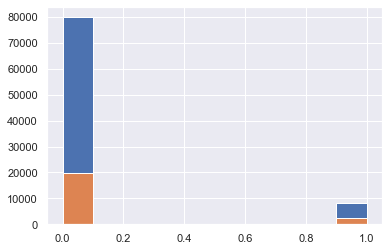

In [12]:
df.Scholarship[No].hist(); 
df.Scholarship[Yes].hist(); #note: 0 means is not enrolled in the bolsa familia welfare program and 1 means enrolled

In [13]:
print(df.Scholarship[No].sum())
print(df.Scholarship[Yes].sum())

8283
2578


<AxesSubplot:>

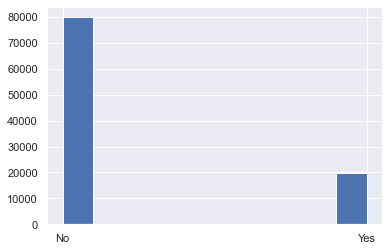

In [14]:
zero = df.Scholarship == 0
df.Noshow[zero].hist()

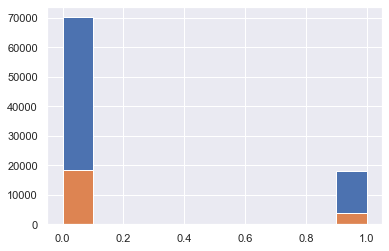

In [15]:
df.Hipertension[No].hist(); 
df.Hipertension[Yes].hist();

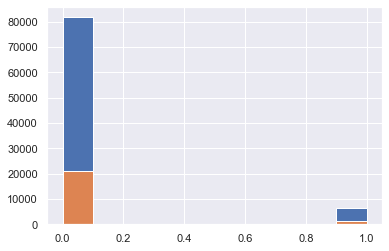

In [16]:
df.Diabetes[No].hist(); 
df.Diabetes[Yes].hist();

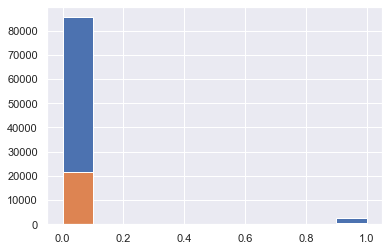

In [17]:
df.Alcoholism[No].hist(); 
df.Alcoholism[Yes].hist();

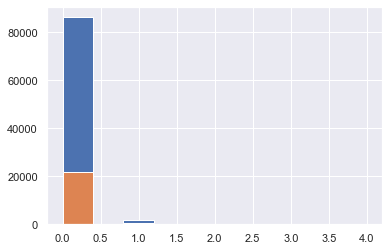

In [18]:
df.Handcap[No].hist(); 
df.Handcap[Yes].hist();

<AxesSubplot:>

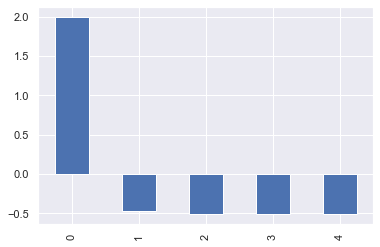

In [19]:
from scipy import stats
mean_hc = df['Handcap'].mean()
df1 = pd.DataFrame(df.groupby('Handcap')['Scholarship'].count()).reset_index()
df1['Scholarship'] = stats.zscore(df1['Scholarship'])
# df1['Scholarship'].plot(kind='hist')

df1['Scholarship'].plot(kind='bar')

   Handcap Noshow  Scholarship
0        0     No        86374
1        0    Yes        21912
2        1     No         1676
3        1    Yes          366
4        2     No          146
5        2    Yes           37
6        3     No           10
7        3    Yes            3
8        4     No            2
9        4    Yes            1


<AxesSubplot:ylabel='Frequency'>

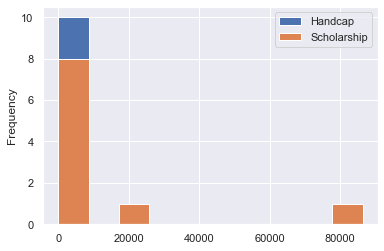

In [20]:
print(df.groupby(['Handcap','Noshow'])['Scholarship'].count().reset_index())
df.groupby(['Handcap','Noshow'])['Scholarship'].count().reset_index().plot(kind='hist')

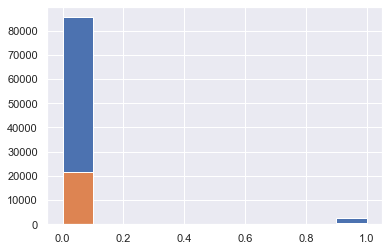

In [53]:
df_no['Alcoholism'].hist();
df_yes['Alcoholism'].hist();

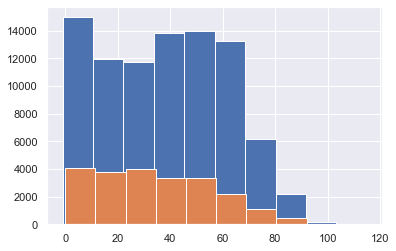

In [57]:
df_no['Age'].hist();
df_yes['Age'].hist();

In [60]:
df_no.groupby('Neighbourhood')['No-show'].count()
# df_yes['Neighbourhood'].plot(kind='pie');

Neighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
                       ... 
SÃO JOSÉ               1549
SÃO PEDRO              1933
TABUAZEIRO             2559
UNIVERSITÁRIO           120
VILA RUBIM              710
Name: No-show, Length: 80, dtype: int64

In [26]:
df.groupby(['No-show'])['Alcoholism'].count()

No-show
No     88208
Yes    22319
Name: Alcoholism, dtype: int64

In [27]:
df.groupby(['No-show'])['Hipertension'].count()

No-show
No     88208
Yes    22319
Name: Hipertension, dtype: int64

In [38]:
df.groupby(['Handcap'])['No-show'].count()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: No-show, dtype: int64

In [30]:
df.groupby(['No-show','SMS_received']).count()

PatientId  AppointmentID  Gender  ScheduledDay  \
No-show SMS_received                                                   
No      0                 62510          62510   62510         62510   
        1                 25698          25698   25698         25698   
Yes     0                 12535          12535   12535         12535   
        1                  9784           9784    9784          9784   

                      AppointmentDay    Age  Neighbourhood  Scholarship  \
No-show SMS_received                                                      
No      0                      62510  62510          62510        62510   
        1                      25698  25698          25698        25698   
Yes     0                      12535  12535          12535        12535   
        1                       9784   9784           9784         9784   

                      Hipertension  Diabetes  Alcoholism  Handcap  
No-show SMS_received                                               
No      0                    62510     62510       62510    62510  
        1                    25698     25698       25698    25698  
Yes     0                    12535     12535       12535    12535  
        1                     9784      9784        9784     9784

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!